In [37]:
pip install pandas openpyxl



SyntaxError: invalid syntax (782136846.py, line 1)

In [5]:
import pandas as pd

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

print(df.dtypes)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [39]:
import pandas as pd
file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'
df = pd.read_csv(file_path)
print("Column names in the DataFrame:", df.columns)
columns_to_drop = ['id', 'Unnamed: 0']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(columns=col, axis=1, inplace=True)
summary = df.describe()
print(summary)


Column names in the DataFrame: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.401822e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.673622e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.

In [11]:
import pandas as pd

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

floor_counts = df['floors'].value_counts().to_frame()

floor_counts.columns = ['Number of Houses']

print(floor_counts)


        Number of Houses
floors                  
1.0                10680
2.0                 8241
1.5                 1910
3.0                  613
2.5                  161
3.5                    8


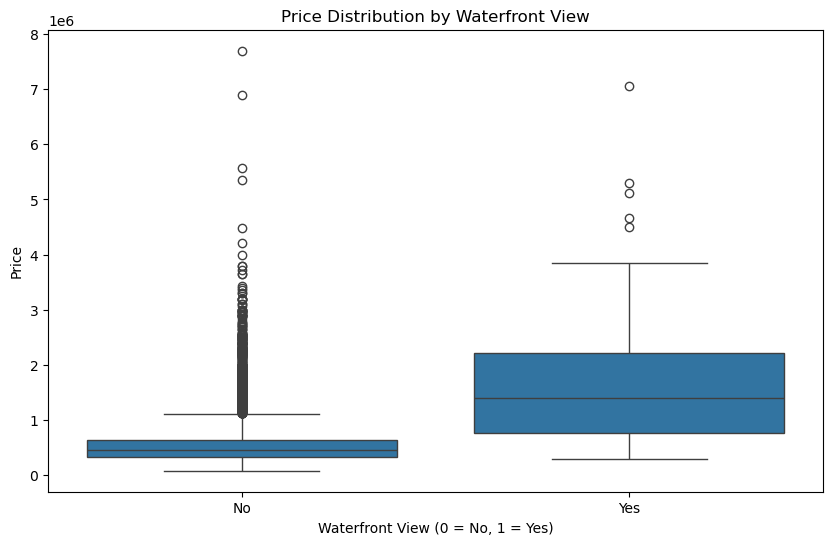

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'
df = pd.read_csv(file_path)
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()


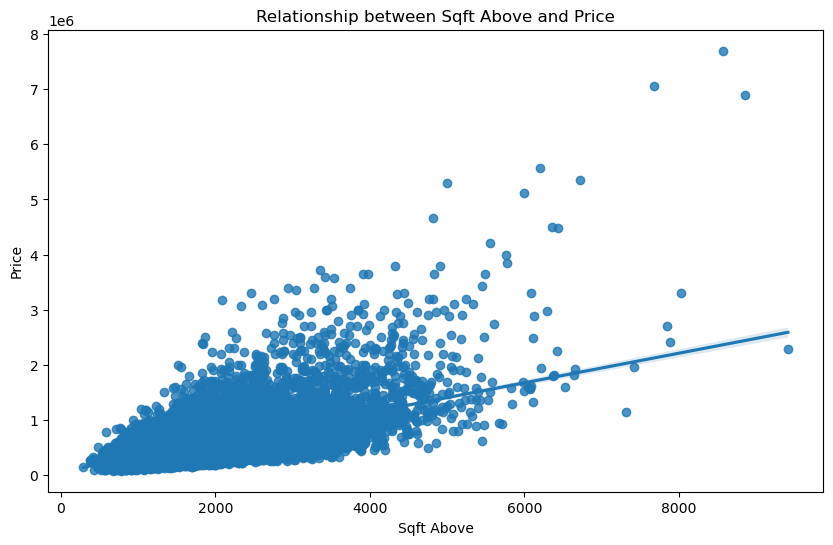

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Relationship between Sqft Above and Price')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.show()


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')


R^2: 0.4792403526045056


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')



R^2: 0.651593514487544


In [25]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),           
    ('poly', PolynomialFeatures(degree=2)), 
    ('model', LinearRegression())           
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')


R^2: 0.7298196819205967


In [27]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')


R^2: 0.6516014224171118


In [29]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

file_path = r'C:\Users\asankpal6348\Downloads\STOCK\kc_house_data1.csv'

df = pd.read_csv(file_path)

features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')


R^2: 0.7157680909394057


In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

import yfinance as yf

# Define the ticker symbol for Tesla
ticker = 'TSLA'

# Fetch the stock data from yfinance
tesla_data = yf.download(ticker, start='2022-01-01', end='2023-12-31')

# Reset the index
tesla_data_reset = tesla_data.reset_index()

# Save the DataFrame to a CSV file
tesla_data_reset.to_csv('tesla_data.csv', index=False)

# Display the first five rows of the DataFrame
print(tesla_data_reset.head())


SyntaxError: invalid syntax (2969907482.py, line 1)

In [10]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data = tesla_data.reset_index()

tesla_data.to_csv(r'C:\Users\asankpal6348\Downloads\STOCK\TESLA STOCK', index=False)

print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [14]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")

tesla_financials = tesla.quarterly_financials

tesla_revenue = tesla_financials.loc['Total Revenue'].transpose()

tesla_revenue = tesla_revenue.reset_index()

tesla_revenue.columns = ['Date', 'Revenue']

tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

tesla_revenue = tesla_revenue.sort_values('Date', ascending=False)

print(tesla_revenue.tail())

        Date       Revenue
1 2023-12-31  2.516700e+10
2 2023-09-30  2.335000e+10
3 2023-06-30  2.492700e+10
4 2023-03-31  2.332900e+10
5 2022-12-31           NaN


In [16]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data = gme_data.reset_index()

gme_data.to_csv('gme_stock_data.csv', index=False)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [20]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")

gme_financials = gme.quarterly_financials

gme_revenue = gme_financials.loc['Total Revenue'].transpose()

gme_revenue = gme_revenue.reset_index()

gme_revenue.columns = ['Date', 'Revenue']

gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

gme_revenue = gme_revenue.sort_values('Date', ascending=False)

print(gme_revenue.tail())

        Date       Revenue
1 2023-10-31  1.078300e+09
2 2023-07-31  1.163800e+09
3 2023-04-30  1.237100e+09
4 2023-01-31  2.226400e+09
5 2022-10-31           NaN


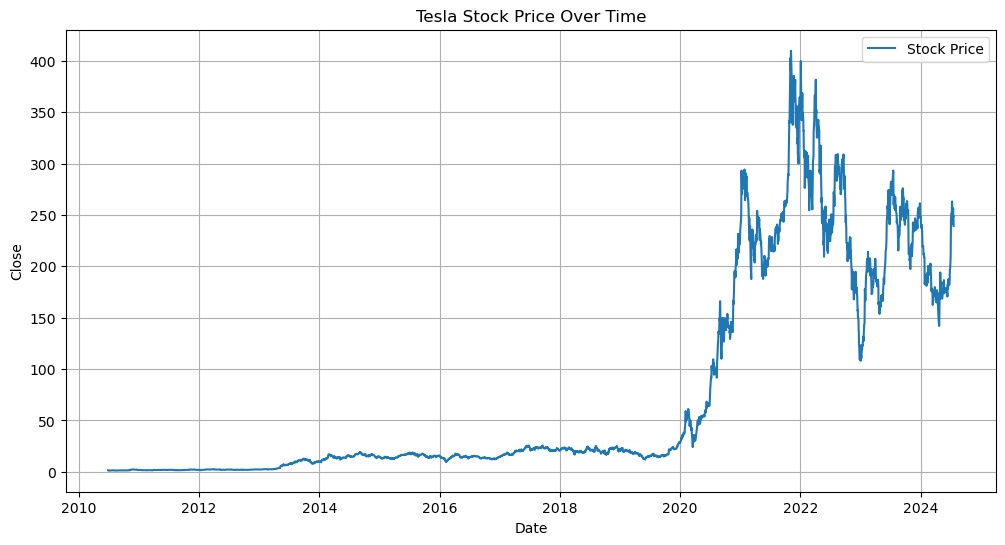

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(data, x_column, y_column, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data[x_column], data[y_column], label='Stock Price')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)
    plt.legend()
    plt.grid(True)

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data = tesla_data.reset_index()

if 'Date' in tesla_data.columns and 'Close' in tesla_data.columns:
    make_graph(tesla_data, 'Date', 'Close', 'Tesla Stock Price Over Time')
else:
    print("Required columns 'Date' and 'Close' not found in the data.")

plt.show()


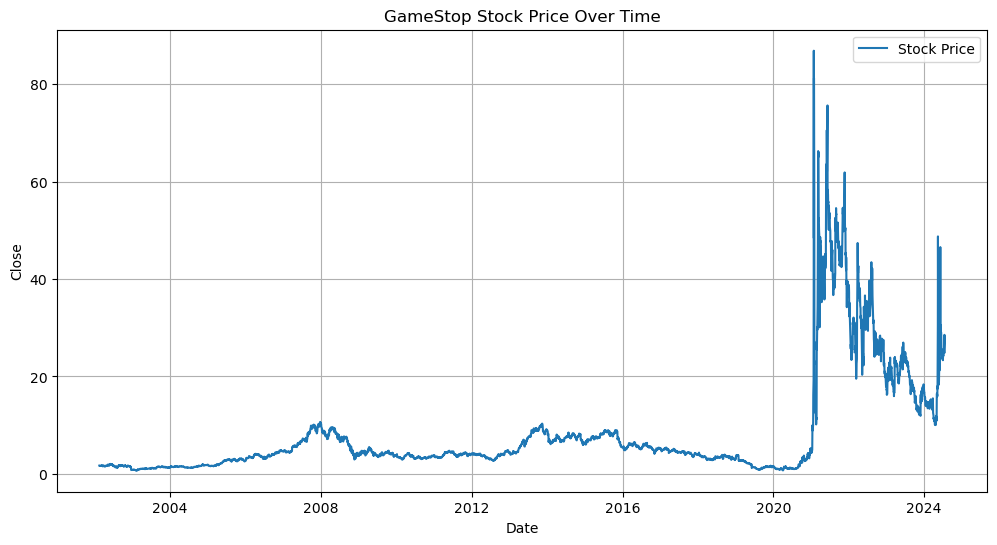

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data = gme_data.reset_index()

if 'Date' in gme_data.columns and 'Close' in gme_data.columns:
    make_graph(gme_data, 'Date', 'Close', 'GameStop Stock Price Over Time')
else:
    print("Required columns 'Date' and 'Close' not found in the data.")

plt.show()